# Лабораторна робота 1. Побудова простого лінійного бінарного класифікатора

За допомогою засобів Anaconda PowerShell Prompt оновлюємо conda та встановлюємо необхідні пакети: numpy та matplotlib в створене в попередній лабораторні й роботі середовище pattern

[0.9999999999999999, -1]


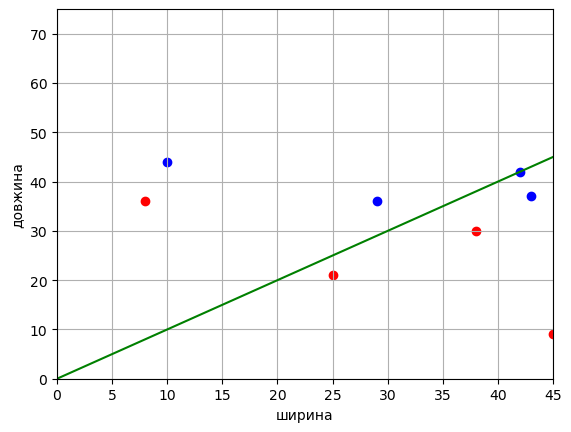

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def classifier(x_train, y_train):

    change = True

    n_train = len(x_train)  # розмір навчальної вибірки
    w = [0, -1]  # початкове значення вектора w
    a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])  # правило класифікації
    L = 0.1  # крок зміни ваги
    e = 0.1  # невелике додаток до w0, щоб забезпечити зазор між лінією розділення та областю
    count = 0
    last_error_index = -1  # індекс останньої помилкової спостереження
    while change and count<100:
        change = False
        for i in range(n_train):  # ітерація по спостереженням
            if y_train[i] * a(x_train[i]) < 0:  # якщо помилка класифікації,
                w[0] = w[0] + L * y_train[i]  # то коригування ваги w0
                last_error_index = i
                change = True


        Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
        if Q == 0:  # показник якості класифікації (кількість помилок)
            break  # зупинка, якщо всі класифікуються правильно
        count += 1
    if last_error_index > -1:
        w[0] = w[0] + e * y_train[last_error_index]

    print(w)

    line_x = list(range(max(x_train[:, 0])))  # створення графіка роздільної лінії
    line_y = [w[0] * x for x in line_x]

    x_0 = x_train[y_train == 1]  # формування точок для 1-го
    x_1 = x_train[y_train == -1]  # і 2-го класів

    plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
    plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
    plt.plot(line_x, line_y, color='green')

    plt.xlim([0, 45])
    plt.ylim([0, 75])
    plt.ylabel("довжина")
    plt.xlabel("ширина")
    plt.grid(True)
    plt.show()
x_train_1 = np.array([[10, 44], [38, 30], [43, 37], [50, 27], [47, 10], [ 8, 36], [25, 21], [45,  9], [42, 42], [29, 36]])
y_train_1 = np.array([-1,  1,  -1, 1, -1,  1,  1, 1,  -1, -1])
classifier(x_train_1, y_train_1)

Відповіді на контрольні питання

1. Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання

Розпізнавання образів у машинному навчанні базується на підготовці даних, виборі відповідної моделі, навчанні моделі на основі навчальних даних, оцінці та валідації її ефективності, тюнінгу та оптимізації параметрів для досягнення найкращих результатів, після чого модель може бути використана для реального розпізнавання образів, що дозволяє автоматизувати процеси класифікації, визначення об'єктів, розпізнавання тексту та облич.

2. Що о таке навчальна вибірка і чому вона важлива для процесу розпізнавання образі

Навчальна вибірка - це набір даних, які використовуються для навчання моделі розпізнавання образів у машинному навчанні. Ця вибірка містить образи з правильно відомими мітками або класами, що дозволяє моделі вивчати залежності між ознаками образів і їх класифікацією. Навчальна вибірка важлива, оскільки вона дозволяє моделі здобувати знання та створювати алгоритми, які можуть правильно класифікувати нові образи після завершення процесу навчання. Чим більше і різноманітніші дані містить навчальна вибірка, тим більш адаптивною та точною може стати модель розпізнавання образів.

3. Сформулювати постановку задачі бінарної класифікац

Постановка задачі бінарної класифікації полягає в тому, щоб знаходити залежність між набором ознак (фіч) і двома можливими класами об'єктів. У цьому випадку існують лише два можливих класи, які ми намагаємося передбачити для нових об'єктів на підставі їхніх характеристик. Основна мета полягає в тому, щоб навчити модель відповідати правильному класу на основі вхідних ознак, які вона отримує, та побудувати алгоритм, який може автоматично класифікувати нові дані, які вона раніше не бачила, на один з двох можливих класів.

4. Що таке рівняння гіперплощини, і як воно використовується для розв’язання задачі бінарної класифіка

Рівняння гіперплощини - це математичне вираз, який описує гіперплощину в просторі вищих вимірів. Гіперплощина - це аналог площини, яка розділяє простір на дві частини.

У задачі бінарної класифікації рівняння гіперплощини використовується для розділення двох класів об'єктів у просторі ознак. В основі цього підходу лежить ідея створення моделі, яка може виділяти гіперплощину так, щоб об'єкти одного класу знаходилися по одну сторону площини, а об'єкти іншого класу - по іншу сторону.

5. Наведіть кроки для розв’язання простої задачі бінарної класифікації за допомогою машинного на
   
   1. Зібрати набір даних, який включає ознаки (фічі) та відповідні класи (мітки) для кожного об'єкта. Провести попередню обробку даних, таку як очищення, нормалізація, видалення відсутніх значень тощо.
   2. Вибрати модель для класифікації, таку як логістична регресія, метод опорних векторів (SVM), навчання дерева рішень тощо. Вибір моделі залежить від характеристик даних та особливостей задач
   3. Розділити набір даних на тренувальний та тестовий набори. Тренувальний набір використовується для навчання моделі, тоді як тестовий - для оцінки її ефективно
   4. Використати тренувальний набір даних для навчання обраної моделі. Модель навчається знаходити залежності між ознаками та класами об'єктів у тренувальному н
   5. Використатти тестовий набір даних для оцінки ефективності навченої моделі. Це допомагає визначити точність та надійність моделі перед застосуванням до новишень тощо.
   6. Після оцінки моделі вона може бути використана для класифікації нових даних. Модель може передбачати клас об'єктів на основі їхніх ознак.